In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates
from pandas.api.types import is_numeric_dtype

In [2]:
bond_yield_df = pd.read_csv("Bond yield.csv")
cpi_df = pd.read_csv("Consumer price index.csv")
dj_df = pd.read_csv("Dow Jones.csv")
usd_eur_df = pd.read_csv("USD_EUR.csv")
usd_jpy_df = pd.read_csv("USD_JPY.csv")
gdp_df = pd.read_csv("GDP.csv")
national_hpi_df = pd.read_csv("National home price index.csv")
sp_df = pd.read_csv("S&P Price.csv")

dfs = [bond_yield_df, cpi_df, dj_df, usd_eur_df, usd_jpy_df, gdp_df, national_hpi_df, sp_df]

In [3]:
for i in range(len(dfs)):
    dfs[i].columns.values[0] = 'date'
    dfs[i] = dfs[i].drop_duplicates(subset="date", keep="first")  # Remove duplicate date entries

    dfs[i].set_index('date', inplace=True)
    dfs[i].index = pd.to_datetime(dfs[i].index, errors="coerce").normalize()

    # Ensure the index is unique
    dfs[i] = dfs[i][~dfs[i].index.duplicated(keep="first")]
    


In [4]:
dj_df.shape

(13375, 2)

In [5]:
for df in dfs:
    print(df.head(4))

            DGS10
date             
1962-01-02   4.06
1962-01-03   4.03
1962-01-04   3.99
1962-01-05   4.02
            CPIAUCSL
date                
1947-01-01     21.48
1947-02-01     21.62
1947-03-01     22.00
1947-04-01     22.00
              DJIA
date              
1979-12-25  839.16
1979-12-26  838.14
1979-12-27   840.1
1979-12-28  838.91
              EURO
date              
1980-07-09  0.6701
1980-07-10  0.6709
1980-07-11  0.6708
1980-07-14  0.6718
               JPY
date              
1971-01-05  357.81
1971-01-06  357.86
1971-01-07  357.87
1971-01-08  357.82
                GDP
date               
1947-01-01  243.164
1947-04-01  245.968
1947-07-01  249.585
1947-10-01  259.745
            CSUSHPINSA
date                  
1987-01-01      63.733
1987-02-01      64.132
1987-03-01      64.468
1987-04-01      64.972
                Value
date                 
1927-12-30  17.660000
1928-01-03  17.760000
1928-01-04  17.719999
1928-01-05  17.549999


In [6]:
merged_df = pd.concat(dfs, axis=1)

In [7]:
df = merged_df[['Value', 'DJIA', 'GDP', 'DGS10', 'CSUSHPINSA', 'CPIAUCSL', 'EURO', 'JPY']]
df.columns = ['SP_price','dow_jones','gdp','bond_yield','home_price_index','consumer_price_index','eur','jpy']

df.reset_index(inplace=True)
full_date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
df.set_index("date", inplace=True)  # Set 'date' as the index
df = df.reindex(full_date_range)  # Fill missing dates
df.index.name = "date"  # Keep the index name

# df= df.fillna(method='ffill')



In [8]:
# csv = df.to_csv('Combined df.csv', index = False) 


In [9]:
def insert_mirrored_rows(df, num_rows=30):
    """
    Insert chronologically mirrored data point at head and tail of df
    """
    df = df.copy()
    mirrored_rows_head = df.iloc[:num_rows].copy()
    mirrored_rows_head = mirrored_rows_head.iloc[::-1].reset_index(drop=True)

    mirrored_rows_tail = df.iloc[-num_rows:].copy()
    mirrored_rows_tail = mirrored_rows_tail.iloc[::-1].reset_index(drop=True)

    df_extended = pd.concat([mirrored_rows_head, df, mirrored_rows_tail], ignore_index=True)
    
    return df_extended

In [10]:
df['SP_price_ln'] = np.log(df['SP_price'])
df['dow_jones'] = pd.to_numeric(df['dow_jones'].str.replace(',', '', regex=True))

extended_df = insert_mirrored_rows(df['SP_price'].copy(), 200)
df.dtypes

SP_price                float64
dow_jones               float64
gdp                     float64
bond_yield              float64
home_price_index        float64
consumer_price_index    float64
eur                     float64
jpy                     float64
SP_price_ln             float64
dtype: object

In [11]:
ma30_df = df.rolling(window=30).mean().reset_index().iloc[30:-30].reset_index(drop=True)
ma100_df = df.rolling(window=100).mean().reset_index().iloc[100:-100].reset_index(drop=True)
ma200_df = df.rolling(window=200).mean().reset_index().iloc[200:-200].reset_index(drop=True)
df['SP_MA_30'] = ma30_df['SP_price']
df['SP_MA_100'] = ma100_df['SP_price']
df['SP_MA_200'] = ma200_df['SP_price']

In [12]:

df.reset_index(inplace=True)  # Move the index back to a column
df.head(500)


,date,SP_price,dow_jones,gdp,bond_yield,home_price_index,consumer_price_index,eur,jpy,SP_price_ln,SP_MA_30,SP_MA_100,SP_MA_200
0,1927-12-30,17.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.871302,NaN,NaN,NaN
1,1927-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1928-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1928-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1928-01-03,17.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.876949,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1929-05-08,26.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.264996,NaN,NaN,NaN
496,1929-05-09,26.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.258865,NaN,NaN,NaN
497,1929-05-10,26.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.271089,NaN,NaN,NaN
498,1929-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Locator attempting to generate 1283 ticks ([-17108.0, ..., 21915.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1283 ticks ([-17108.0, ..., 21915.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1283 ticks ([-17108.0, ..., 21915.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1283 ticks ([-17108.0, ..., 21915.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1283 ticks ([-17108.0, ..., 21915.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1283 ticks ([-17108.0, ..., 21915.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1283 ticks ([-17108.0, ..., 21915.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1283 ticks ([-17108.0, ..., 21915.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1283 ticks ([-17108.0, ..., 21915.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting 

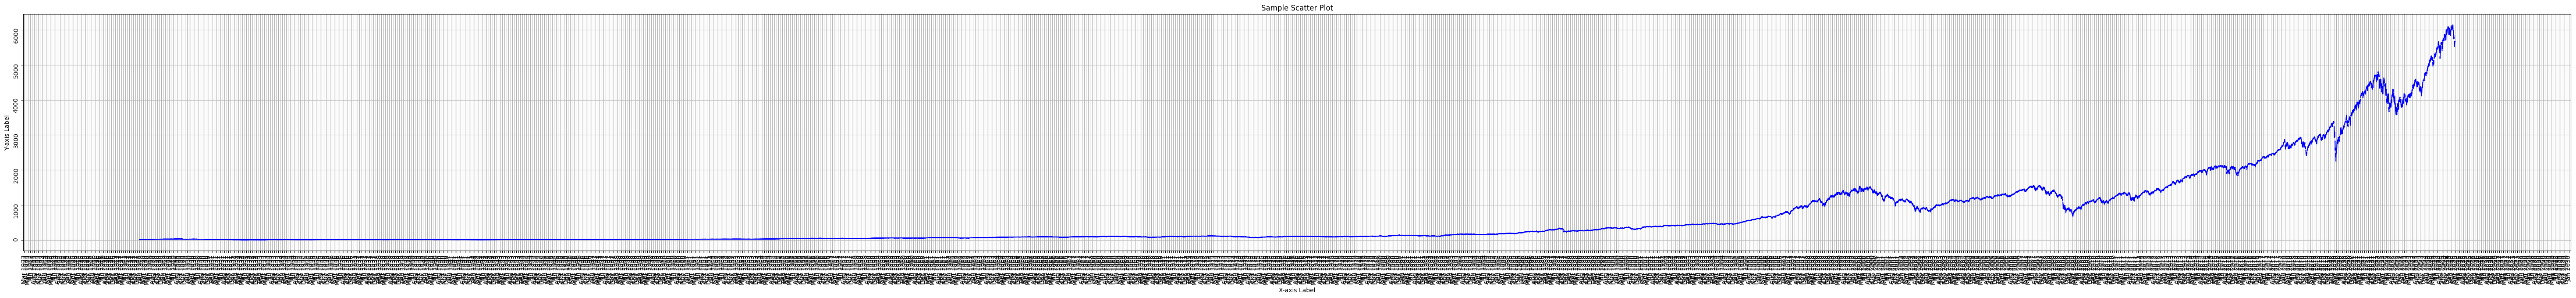

In [13]:
plt.figure(figsize=(75, 7))
plt.plot(df['date'], df['SP_price'], linestyle='-', color='b', markersize=6, label="Data Line")
# Add labels and title

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.title('Sample Scatter Plot')

plt.grid(True)
# Show color bar

# Show the plot
plt.show()

In [14]:
csv = df.to_csv('Combineddwq12456345t df.csv', index = False) 


In [15]:
df_first_of_month = df[df['date'].dt.day == 1]

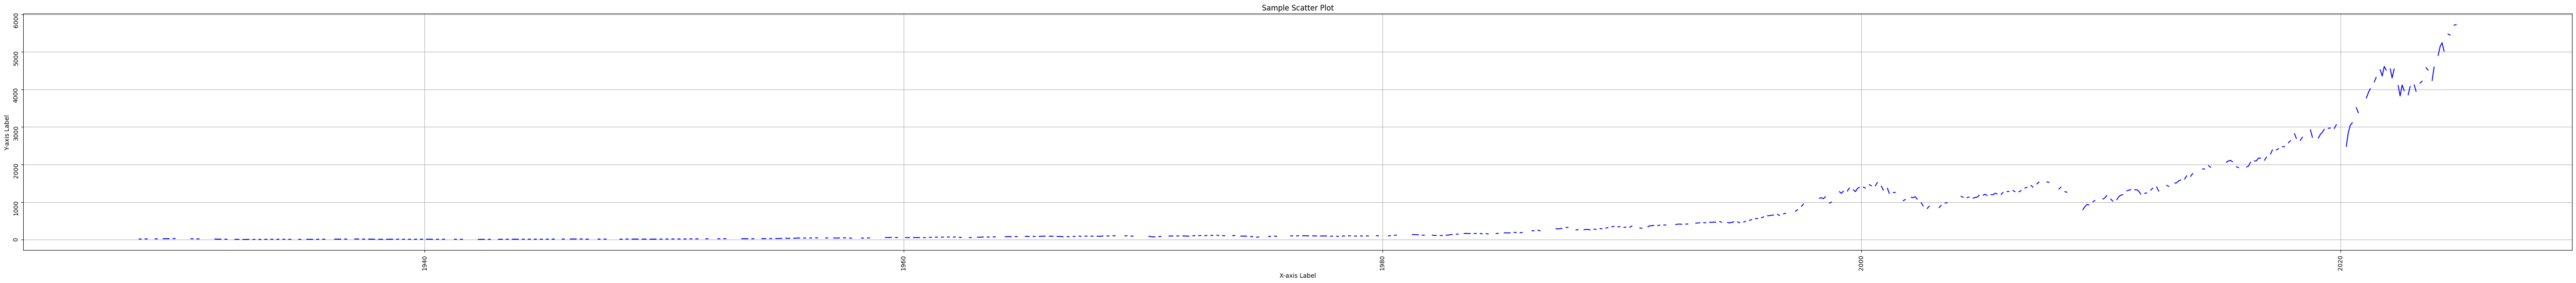

In [16]:
plt.figure(figsize=(75, 7))
plt.plot(df_first_of_month['date'], df_first_of_month['SP_price'], linestyle='-', color='b', markersize=6, label="Data Line")
# Add labels and title

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.title('Sample Scatter Plot')

plt.grid(True)
# Show color bar

# Show the plot
plt.show()

In [17]:
df_first_of_month.head(10)

,date,SP_price,dow_jones,gdp,bond_yield,home_price_index,consumer_price_index,eur,jpy,SP_price_ln,SP_MA_30,SP_MA_100,SP_MA_200
2,1928-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1928-02-01,17.530001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.863914,NaN,NaN,NaN
62,1928-03-01,17.299999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.850706,NaN,NaN,NaN
93,1928-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,1928-05-01,19.780001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.984671,NaN,NaN,NaN
154,1928-06-01,20.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.999226,NaN,NaN,NaN
184,1928-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1928-08-01,19.420000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.966303,NaN,NaN,NaN
246,1928-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,1928-10-01,21.360001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.061520,NaN,NaN,NaN


In [18]:
csv = df_first_of_month.to_csv('Combinedfirs22dssssssss222t df.csv', index = False) 
